In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [107]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/HR_attrition_rate.csv")

In [108]:
df.shape

(14999, 10)

In [109]:
display(df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [111]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [11]:
#data processing

In [112]:
df["left"]=df["left"].apply(lambda x:1 if x>0.2 else 0)

In [16]:
#converting catagorical varriables to numerical 

In [113]:
df['salary']=df['salary'].map({'low':0,'medium':1,'high':2})

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [33]:
#exploratory data analysis

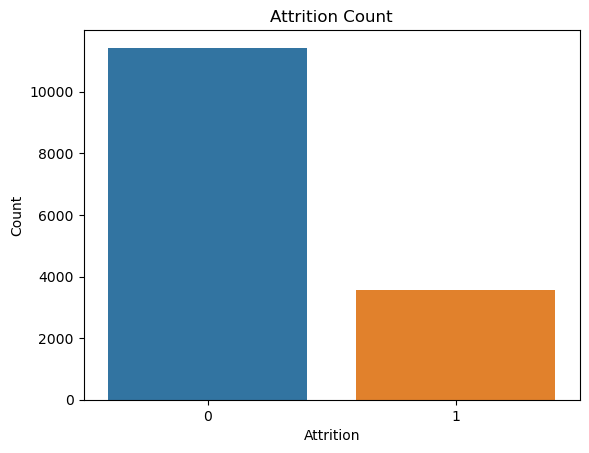

In [115]:
sns.countplot(x='left',data=df)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')
plt.show()

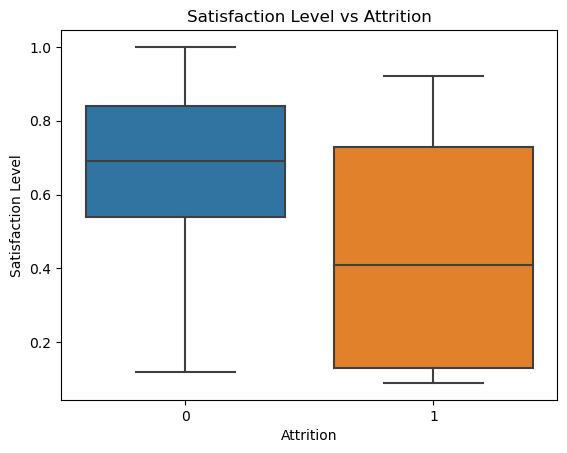

In [116]:
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.xlabel('Attrition')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs Attrition')
plt.show()

C:\Users\pramood\AppData\Local\Temp\ipykernel_30096\597897618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


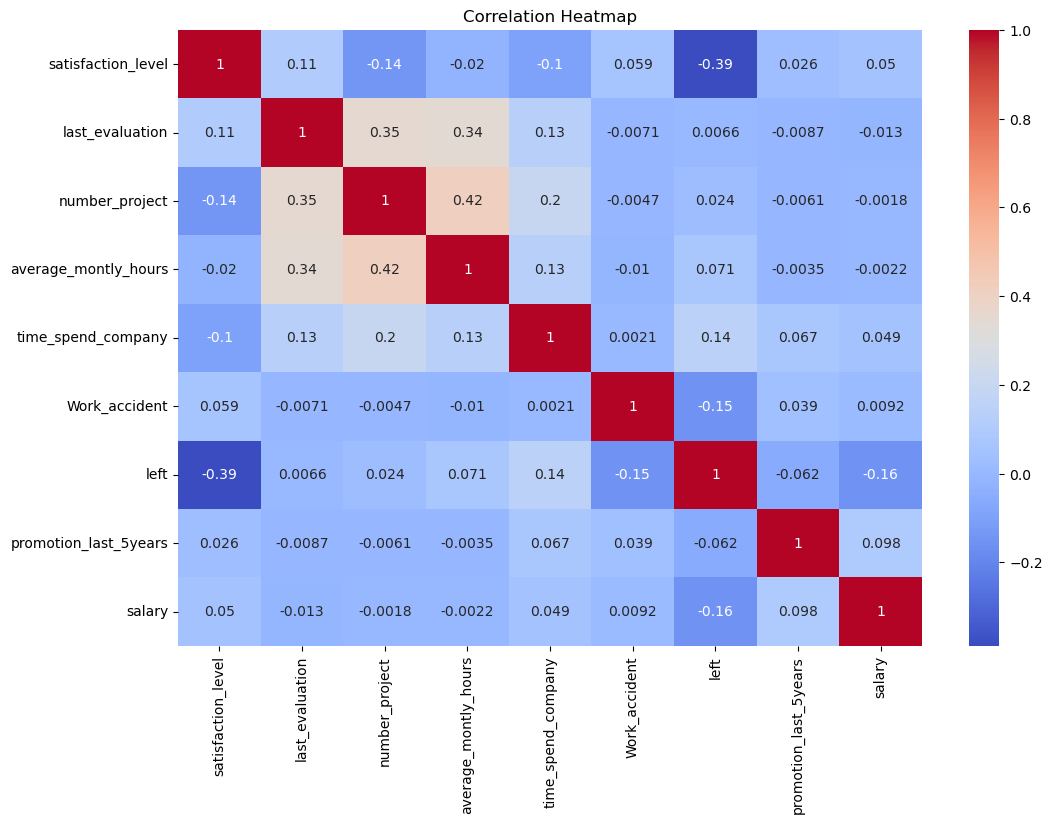

In [117]:
correlation=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [47]:
#split the data into features X and target varriables y

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  int32  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 1.1 MB


In [118]:
df.rename(columns=lambda x:x.strip(),inplace=True)

In [119]:
encoder=LabelEncoder()
df['Departments']=encoder.fit_transform(df['Departments'])
df['left']=encoder.fit_transform(df['left'])

In [121]:
X=df.drop(['left'],axis=1)
y=df['left']

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [124]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9886666666666667


In [128]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)

Precision: 0.9883720930232558
Recall: 0.9631728045325779
F1: 0.9756097560975608


,Test,Pred
6723,0,0
6473,0,0
4679,0,0
862,1,1
7286,0,0


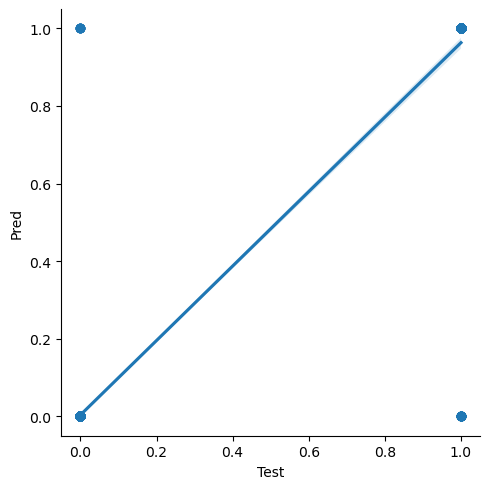

In [125]:
data = pd.DataFrame({'Test':y_test , 'Pred':y_pred},columns=['Test','Pred'])
sns.lmplot(x='Test',y='Pred',data=data,palette='rainbow')
data.head()

In [130]:
#confusion Matrix

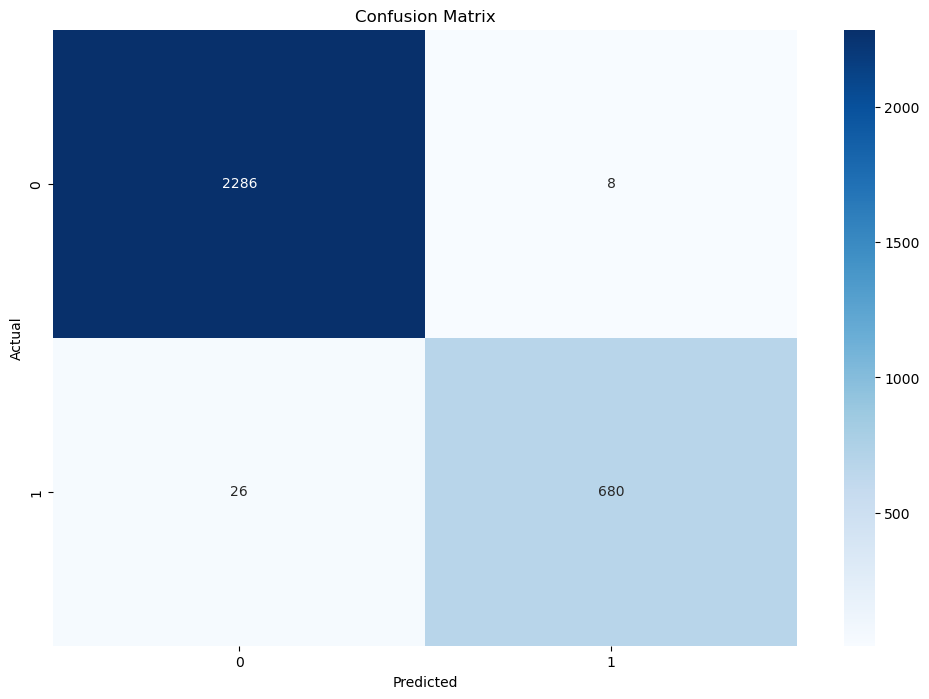

In [133]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()